In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def P(n, N, turn):
    # function to calculate the probability I win for n by n grid
    # N is repeating time
    # If turn=0, the game starts from me
    # If turn=1, the game start from my friend
    
    num = (n**2)//2
    if n%2 == 1: # n is odd
        if turn == 0: # I first
            arr = np.array((1,)*num+(0,)*(num+1))
        if turn == 1: # my friend first
            arr = np.array((1,)*(num+1)+(0,)*num)
    else: # n is even
        arr = np.array((1,)*num+(0,)*num)
    X = 0 # initiate the number of winning
    for _ in range(N):
        np.random.shuffle(arr) # shuffle it every time to randomly generate an element
        det = np.linalg.det(np.reshape(arr,(n,n))) 
        if det == 0:
            X+=1
    return X/N

In [3]:
t = 10
summation = 0
for _ in range(t):
    summation += P(2, 10000, 0)
print(summation/t)

0.66379


In [4]:
n = np.arange(2,20) # generate n from 2 to 19
p0 = [] # initiate probability if it start from me
p1 = [] # initiate probability if it start from my friend
for i in n:
    p0.append(P(i,20000,0))
    p1.append(P(i,20000,1))

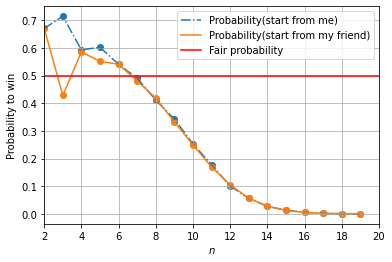

In [5]:
# plot the graph
plt.plot(n,p0, '-.', label='Probability(start from me)')
plt.plot(n,p1,label='Probability(start from my friend)')
plt.axhline(0.5, c='r',label='Fair probability')
plt.scatter(n,p0)
plt.scatter(n,p1)
plt.legend()
plt.grid()
plt.xlim(2,20)
plt.xlabel('$n$')
plt.ylabel('Probability to win')
plt.show()